A classification problem, to predict whether a loan should be approved or not.

Workflow:
    
    1. Importing libraries
    2. Loading data
    3. Summarising data
    4. Filling missing values if any, for both categorical and numerical
       * Categorical: Mode
       * Numerical: Median/Mean/Bfill
    5. Exploratory data analysis
       * Data visualisation
       * Normalisation of data if any outliers found
    6. Conversion of object data type to numbers
    7. Correlation between different variables. (Drop any independent variables if not coorelated to the dependent variable.)
    8. Evaluating different models based on different metrics (Cross validated accuracy, precision, f1 score,
                                                              recall,AUC curve, confusion matrix)
       * Random Forest Classifier
       * Extra Tree Classifier
       * SVC
       * Logistic Regression
       * Kneighbours Classifier
       * Decision Tree Classifier
    9. Tuning the hyper parameters of the best models.
    10.Feature importance

##### Importing initial libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')

In [5]:
df.head().T

,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0,1508,0,2358,0
LoanAmount,NaN,128,66,120,141
Loan_Amount_Term,360,360,360,360,360


##### Statistical Overview

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


##### Data summary

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
#  Let's check if any duplication of rows

df.duplicated().any()

False

In [10]:
#  Dropping unnecessary columns for now Loan_ID

df = df.drop("Loan_ID", axis=1)
df.head().T

,0,1,2,3,4
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0,1508,0,2358,0
LoanAmount,NaN,128,66,120,141
Loan_Amount_Term,360,360,360,360,360
Credit_History,1,1,1,1,1


In [11]:
# Splitting data into categorical and numerical.

cat_data = []
num_data = []

for index, type in enumerate(df.dtypes):
    if type == "object":
        cat_data.append(df.iloc[:, index])
    else:
        num_data.append(df.iloc[:,index])

In [12]:
cat_data = pd.DataFrame(cat_data).transpose()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [13]:
num_data = pd.DataFrame(num_data).transpose()
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


##### Getting deep into categorical data.

In [14]:
cat_data.isna().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [15]:
# Filling missing values with mode.

cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
cat_data.isna().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [16]:
#  Filling missing values in the numerical data.
#  Firstly, let's check the stats.
num_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
num_data.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [18]:
#  For Loan amount since there is major difference between median and mean. So, let's fill the missing values with median.

num_data.LoanAmount = num_data.LoanAmount.fillna(num_data["LoanAmount"].median())
num_data.LoanAmount.isna().sum()

0

In [19]:
# Filling remaining missing values with previously occuring value in resspective columns.

num_data.Loan_Amount_Term = num_data.Loan_Amount_Term.fillna(method="bfill")
num_data.Credit_History = num_data.Credit_History.fillna(method="bfill")

In [20]:
# Rechecking, if any missing values remaining.
num_data.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

##### Exploratory Data Analysis

* Distribution plots for numerical data

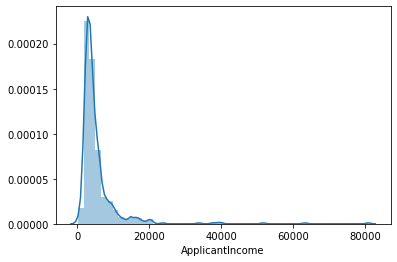

In [21]:
sns.distplot(num_data.ApplicantIncome);

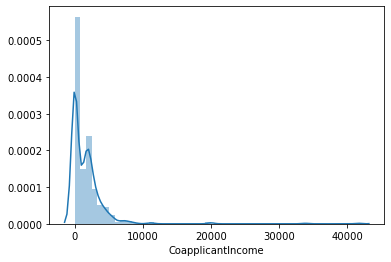

In [22]:
sns.distplot(num_data.CoapplicantIncome);

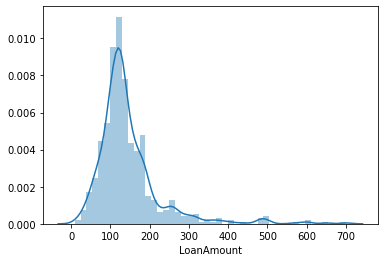

In [23]:
sns.distplot(num_data.LoanAmount);

In [24]:
#  Since above plots are not gaussian. Let's normalise them and get rid of outliers.

num_data.ApplicantIncome = np.log(num_data.ApplicantIncome)
num_data.CoapplicantIncome = np.log(num_data.CoapplicantIncome + 1)  # Since some values are zero to avoid log 0 =infinity.
num_data.LoanAmount = np.log(num_data.LoanAmount)
num_data.Loan_Amount_Term = np.log(num_data.Loan_Amount_Term)

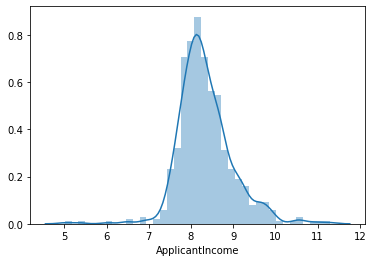

In [25]:
#   Again checking the plots.

sns.distplot(num_data.ApplicantIncome);

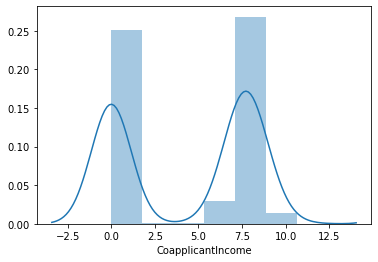

In [26]:
sns.distplot(num_data.CoapplicantIncome);

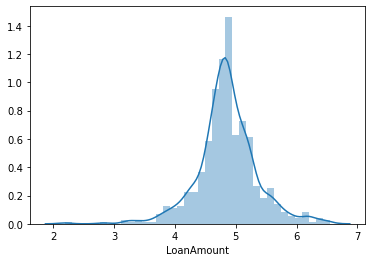

In [27]:
sns.distplot(num_data.LoanAmount);

* Categorical data visualisation

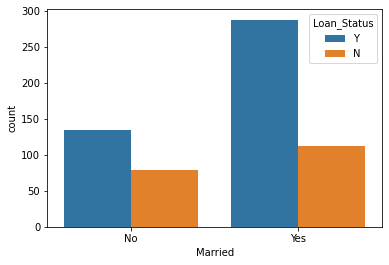

In [28]:
#  Married v/s Loan status
sns.countplot(x="Married", hue="Loan_Status", data=cat_data);

#  There is higher chance of loan approval if you are married.

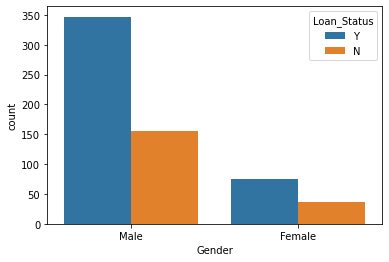

In [29]:
#  Gender v/s Loan status
sns.countplot(x="Gender", hue="Loan_Status", data=cat_data);

#  Most of the males have got there loans approved.

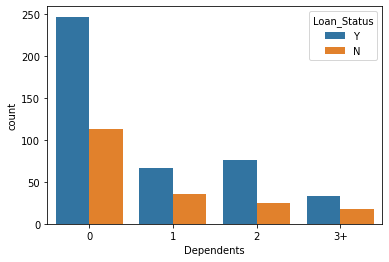

In [30]:
#  Dependents v/s Loan status
sns.countplot(x="Dependents", hue="Loan_Status", data=cat_data);

#  Having zero dependency increases the probability of loan approval.

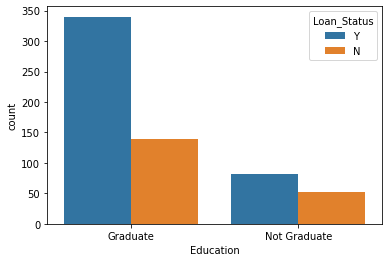

In [31]:
#  Education v/s Loan status
sns.countplot(x="Education", hue="Loan_Status", data=cat_data);

#  Graduation preffered over non graduates.


In [32]:
#  Concatenating the updated categorical and numerical data

data = pd.concat([num_data, cat_data], axis=1)
data.head().T

,0,1,2,3,4
ApplicantIncome,8.67403,8.43011,8.00637,7.85671,8.69951
CoapplicantIncome,0,7.3192,0,7.76599,0
LoanAmount,4.85203,4.85203,4.18965,4.78749,4.94876
Loan_Amount_Term,5.8861,5.8861,5.8861,5.8861,5.8861
Credit_History,1,1,1,1,1
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No


##### Converting categorical data to numbers.

In [33]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

cols = ['Gender', 'Married', 'Education', 
        'Self_Employed', 'Property_Area', 
        'Loan_Status', 'Dependents']
for col in cols:
    data[col] = LE.fit_transform(data[col])

data.head().T

,0,1,2,3,4
ApplicantIncome,8.674026,8.430109,8.006368,7.856707,8.699515
CoapplicantIncome,0.000000,7.319202,0.000000,7.765993,0.000000
LoanAmount,4.852030,4.852030,4.189655,4.787492,4.948760
Loan_Amount_Term,5.886104,5.886104,5.886104,5.886104,5.886104
Credit_History,1.000000,1.000000,1.000000,1.000000,1.000000
Gender,1.000000,1.000000,1.000000,1.000000,1.000000
Married,0.000000,1.000000,1.000000,1.000000,0.000000
Dependents,0.000000,1.000000,0.000000,0.000000,0.000000
Education,0.000000,0.000000,0.000000,1.000000,0.000000
Self_Employed,0.000000,0.000000,1.000000,0.000000,0.000000


###### Visualising Correlation

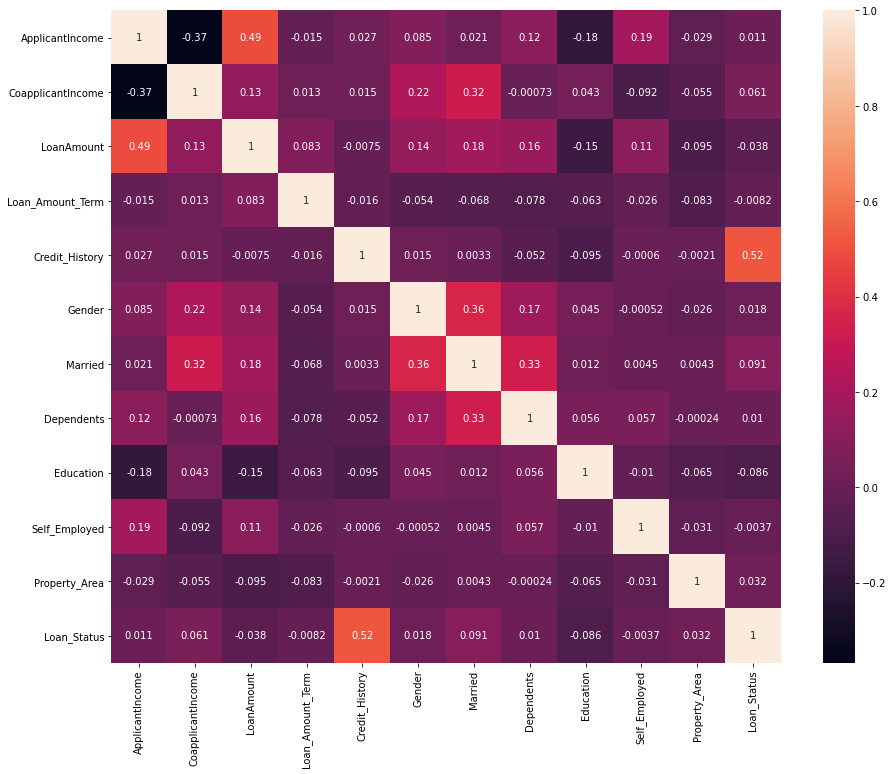

In [34]:
corr = data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True);

##### Interpretation:
    * The dependent variable Loan_status has less correlation with Loan amount term and Self employed.
    Shall drop them during modelling.
    

###### Modelling


In [35]:
#  Splitting into x and y

x = data.drop(["Loan_Amount_Term", "Self_Employed", "Loan_Status"], axis=1)
y = data["Loan_Status"]

In [77]:
#  Splliting into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [78]:
#  Put models in a dictionary

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix



models = {'RandomForestClassifier': RandomForestClassifier(),
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'LogisticRegression': LogisticRegression(),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC()
         }

def Fit_Score(model, x_train, y_train, x_test, y_test, x, y):
    
    
    np.random.seed(45)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = {"Accuracy": model.score(x_test, y_test),
                              "cv_acc": np.mean(cross_val_score(model, x, y, cv=5, scoring="accuracy"))}
    return model_scores

In [79]:

Scores = Fit_Score(model=models, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, x=x, y=y)
pd.DataFrame(Scores.values(), Scores.keys())

,Accuracy,cv_acc
RandomForestClassifier,0.751351,0.781794
ExtraTreesClassifier,0.740541,0.749220
DecisionTreeClassifier,0.664865,0.688951
LogisticRegression,0.772973,0.802972
KNeighborsClassifier,0.724324,0.749207
SVC,0.670270,0.713301


##### Improving the models.
* Further tunning the hyper parameters.

* 1. Random Forest Classifier

a. Random Search CV

In [40]:
grid = {"n_estimators": np.arange(10, 1000, 50),
       "max_depth": [3, 10],
       "min_samples_split": np.arange(2, 20, 2),
       "min_samples_leaf": np.arange(1, 20, 2)}
#  Tunning

np.random.seed(45)
rs_clf = RandomizedSearchCV(RandomForestClassifier(n_jobs=1), 
                            param_distributions=grid, 
                            cv=5, n_iter=15, verbose=True, refit=True)

rs_clf.fit(x_train, y_train)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=15,
                   param_distributions={'max_depth': [3, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [41]:
rs_clf.best_params_

{'n_estimators': 160,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 3}

In [42]:
rs_clf.score(x_test, y_test)

0.8108108108108109

b. Grid Search CV

In [43]:
grid2 = {"n_estimators": [960],
       "max_depth": [3, 10],
       "min_samples_split": [12, 14],
       "min_samples_leaf": [13, 12]}
#  Tunning
np.random.seed(45)

gs_clf = GridSearchCV(RandomForestClassifier(n_jobs=1), 
                            param_grid=grid2, 
                            cv=5, verbose=True, refit=True)

gs_clf.fit(x_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [3, 10], 'min_samples_leaf': [13, 12],
                         'min_samples_split': [12, 14], 'n_estimators': [960]},
             verbose=True)

In [44]:
gs_clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 13,
 'min_samples_split': 12,
 'n_estimators': 960}

In [45]:
gs_clf.score(x_test, y_test)

0.8108108108108109

* 2. Logistic Regression

In [46]:
#  Let's try with some random params if the score increases

grid3 = {"C": np.logspace(-4, 4, 20),
        "solver": ["liblinear"]}

        
#  Tunning
np.random.seed(45)
rs_lr = RandomizedSearchCV(LogisticRegression(n_jobs=1), 
                            param_distributions=grid3, 
                            cv=5, n_iter=15, verbose=True, refit=True)

rs_lr.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(n_jobs=1), n_iter=15,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [47]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 545.5594781168514}

In [48]:
rs_lr.score(x_test, y_test)

0.8108108108108109

### From above tunning it seems the best fit would be with accuracy of 81 %.

#### Further different metrics study. 
Let's take losistic regression as the perfect model.

In [49]:
def Analytics(model, x_train, y_train, x_test, y_test, x, y):
    

    models = {'RandomForestClassifier': RandomForestClassifier(max_depth=3, min_samples_leaf=13, 
                                                               min_samples_split=12, n_estimators=960),
              'ExtraTreesClassifier': ExtraTreesClassifier(),
              'DecisionTreeClassifier': DecisionTreeClassifier(),
              'LogisticRegression': LogisticRegression(solver='liblinear', C=545.5594781168514),
              'KNeighborsClassifier': KNeighborsClassifier(),
              'SVC': SVC()
              }
    model_scores = {}

    np.random.seed(45)
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_preds = model.predict(x_test)
        model_scores[name] ={"cv_acc": np.mean(cross_val_score(model, x, y, cv=5, scoring="accuracy")),
                             "cv_prec": np.mean(cross_val_score(model, x, y, cv=5, scoring="precision")),
                             "cv_recall": np.mean(cross_val_score(model, x, y, cv=5, scoring="recall")),
                             "cv_f1": np.mean(cross_val_score(model, x, y, cv=5, scoring="f1"))
                             }
        
             
    return model_scores
    

In [86]:
final_scores = Analytics(models, x_train, y_train, x_test, y_test, x, y)
scores = pd.DataFrame(final_scores.values(), final_scores.keys())
scores

,cv_acc,cv_prec,cv_recall,cv_f1
RandomForestClassifier,0.802972,0.792028,0.969188,0.871414
ExtraTreesClassifier,0.754072,0.793548,0.871905,0.830167
DecisionTreeClassifier,0.688938,0.774554,0.765266,0.775629
LogisticRegression,0.802972,0.792028,0.969188,0.871414
KNeighborsClassifier,0.749207,0.760133,0.928768,0.835674
SVC,0.713301,0.710313,0.988151,0.826072


#### Since our sample is imbalanced, Precision and recall also plays an important role in addition to accuracy.
#### Best models:
* Logistic Regression/Random Forest Classifier/SVC (good accuracy)
* Extra Trees Classifier (better precesion)

let's further explore

Logistic Regression


## Saving Random Forest Model for use

In [104]:
import os
os.listdir("../output")

FileNotFoundError: [Errno 2] No such file or directory: '../output'

In [102]:
import pickle
filename = '../randomForest.sav'
pickle.dump(models['RandomForestClassifier'], open(filename, 'wb'))


FileNotFoundError: [Errno 2] No such file or directory: '../output/kaggle/working/randomForest.sav'

In [94]:
y_train

173    1
169    1
513    0
266    1
216    0
      ..
580    1
163    1
607    1
544    1
414    0
Name: Loan_Status, Length: 429, dtype: int64

In [99]:
loaded_model = pickle.load(open(filename, 'rb'))
k=x_train.iloc[4]
# print(x_train.iloc[0])
# k=k.reshape(-1, 1)
# print(k)
g=loaded_model.predict([k])
g

FileNotFoundError: [Errno 2] No such file or directory: '../output/randomForest.sav'